<a href="https://colab.research.google.com/github/shumshersubashgautam/AutismClassification/blob/main/Autism_Emotions_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/HSE-asavchenko/face-emotion-recognition.git

Cloning into 'face-emotion-recognition'...
remote: Enumerating objects: 542, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 542 (delta 30), reused 67 (delta 22), pack-reused 453
Receiving objects: 100% (542/542), 476.75 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (217/217), done.
Updating files: 100% (87/87), done.


In [71]:
cd ..

/content


In [72]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 74 Feb 18 07:11 kaggle.json


In [73]:
!pip install -q kaggle

In [74]:
!mkdir -p ~/.kaggle

In [75]:
!cp kaggle.json ~/.kaggle/

In [76]:
!chmod 600 /root/.kaggle/kaggle.json

In [77]:
!kaggle kernels output iravad/autism-prediction-cnn-vgg16-t-sne-visualisation -p /path/to/dest

Kernel log downloaded to /path/to/dest/autism-prediction-cnn-vgg16-t-sne-visualisation.log 


In [78]:
!mkdir autism

In [79]:
cd autism

/content/autism


In [80]:
!kaggle datasets download -d cihan063/autism-image-data

 99% 228M/229M [00:07<00:00, 38.8MB/s]
100% 229M/229M [00:07<00:00, 31.9MB/s]


In [2]:
cd face-emotion-recognition/

/content/face-emotion-recognition


In [91]:
!mv /content/autism/AutismDataset /content/face-emotion-recognition/

In [121]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [122]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential, load_model,model_from_json

%matplotlib inline

In [123]:
from tensorflow.compat.v1.keras.backend import set_session 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

In [124]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

In [10]:
cd src

/content/face-emotion-recognition/src


In [7]:
!sudo apt install cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [8]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=f1911b0186661b008c03fa0ca5f082131d4b3e8b0bf934cd961e601a31a7c2c5
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [171]:
model=load_model('../models/affectnet_emotions/mobilenet_7.h5')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                           

In [130]:
cd src

/content/face-emotion-recognition/src


In [172]:
def mobilenet_preprocess_input(x,**kwargs):
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    return x
preprocessing_function=mobilenet_preprocess_input
INPUT_SIZE = (224, 224)

In [173]:
idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

<ipython-input-174-1ea73a6b3983>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  box = bbox.astype(np.int)


1/1 [==============================] - 0s 23ms/step


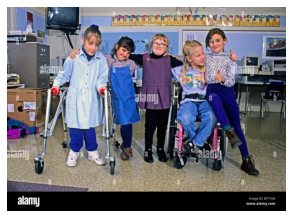

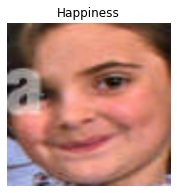

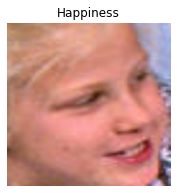

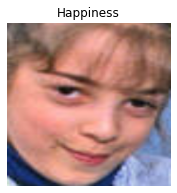

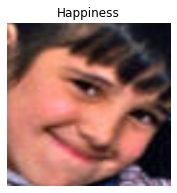

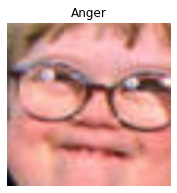

In [174]:
import matplotlib.pyplot as plt
fpath='/content/face-emotion-recognition/test_images/autsm.jpg'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
plt.axis('off')
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    face_img=cv2.resize(face_img,INPUT_SIZE)
    inp=face_img.astype(np.float32)
    inp[..., 0] -= 103.939
    inp[..., 1] -= 116.779
    inp[..., 2] -= 123.68
    inp = np.expand_dims(inp, axis=0)
    scores=model.predict(inp)[0]
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(idx_to_class[np.argmax(scores)])

1/1 [==============================] - 0s 43ms/step


<ipython-input-175-16f7b56364f8>:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  box = bbox.astype(np.int)


1/1 [==============================] - 0s 93ms/step


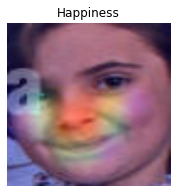

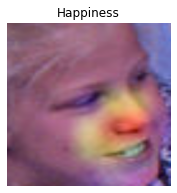

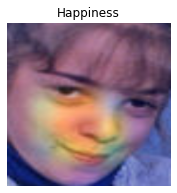

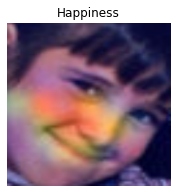

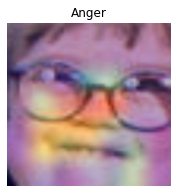

In [175]:
# Code borrowed from https://keras.io/examples/vision/grad_cam/
import matplotlib.cm as cm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(face_img, alpha=0.4):
    last_conv_layer_name = "conv_pw_13"
    inp=face_img.astype(np.float32)
    inp=preprocessing_function(inp)
    inp = np.expand_dims(inp, axis=0)
    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    scores = model.predict(inp)[0]

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(inp, model, last_conv_layer_name)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((face_img.shape[1], face_img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + face_img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    #superimposed_img.save(cam_path)
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.title(idx_to_class[np.argmax(scores)])
    plt.imshow(superimposed_img)


for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    face_img=cv2.resize(face_img,INPUT_SIZE)
    save_and_display_gradcam(face_img)

In [176]:
import torch
from PIL import Image
from torchvision import transforms
use_cuda = torch.cuda.is_available()
print(use_cuda)
device = 'cuda' if use_cuda else 'cpu'

True


In [177]:
USE_ENET2=False
NUM_EMOTIONS=8 #7 #
if NUM_EMOTIONS==7:
    idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
else:
    idx_to_class={0: 'Anger', 1: 'Contempt', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Neutral', 6: 'Sadness', 7: 'Surprise'}
if USE_ENET2:
    IMG_SIZE=260
    if NUM_EMOTIONS==7: # 7 emotions
        PATH='../models/affectnet_emotions/enet_b2_7.pt'
    else:
        PATH='../models/affectnet_emotions/enet_b2_8.pt'
else:
    IMG_SIZE=224
    if NUM_EMOTIONS==7: # 7 emotions from AFFECT_IMG_SEVEN_TRAIN_DATA_DIR and AFFECT_IMG_SEVEN_VAL_DATA_DIR
        PATH='../models/affectnet_emotions/enet_b0_7.pt'
    else:
        #PATH='../models/affectnet_emotions/enet_b0_8_best_vgaf.pt'
        PATH='../models/affectnet_emotions/enet_b0_8_best_afew.pt'

In [178]:
test_transforms = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
print(PATH)
model = torch.load(PATH,map_location=torch.device('cuda'))
model=model.to(device)
model.eval()

../models/affectnet_emotions/enet_b0_8_best_afew.pt


EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=

In [23]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.8 MB/s eta 0:00:00


<ipython-input-168-dd73202b2a4c>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  box = bbox.astype(np.int)


happy [('Anger', -3.121371), ('Contempt', -0.3164016), ('Disgust', -1.3556856), ('Fear', -2.291083), ('Happiness', 1.9342963), ('Neutral', -3.0817719), ('Sadness', -0.038898177), ('Surprise', -3.1544263)]
happy [('Anger', -0.26285598), ('Contempt', -0.4201749), ('Disgust', -0.5295022), ('Fear', -1.1471405), ('Happiness', 2.967471), ('Neutral', 0.5885145), ('Sadness', -0.4178774), ('Surprise', 0.54600394)]
happy [('Anger', -1.067091), ('Contempt', 2.855833), ('Disgust', -2.1072347), ('Fear', -4.8956647), ('Happiness', 4.5854535), ('Neutral', -0.24564707), ('Sadness', -2.0091672), ('Surprise', -1.8795754)]
happy [('Anger', -4.4059916), ('Contempt', 1.4179052), ('Disgust', -2.2219245), ('Fear', -5.713195), ('Happiness', 4.055304), ('Neutral', -3.3515692), ('Sadness', -3.8435075), ('Surprise', -3.0163968)]
happy [('Anger', 0.23230214), ('Contempt', 0.32795766), ('Disgust', -1.2661742), ('Fear', -1.749456), ('Happiness', 4.02055), ('Neutral', 0.5076165), ('Sadness', -2.5355215), ('Surprise'

<ipython-input-168-dd73202b2a4c>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3, 3))
<ipython-input-168-dd73202b2a4c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))


disgust [('Anger', -3.121371), ('Contempt', -0.3164016), ('Disgust', -1.3556856), ('Fear', -2.291083), ('Happiness', 1.9342963), ('Neutral', -3.0817719), ('Sadness', -0.038898177), ('Surprise', -3.1544263)]
disgust [('Anger', -0.26285598), ('Contempt', -0.4201749), ('Disgust', -0.5295022), ('Fear', -1.1471405), ('Happiness', 2.967471), ('Neutral', 0.5885145), ('Sadness', -0.4178774), ('Surprise', 0.54600394)]
disgust [('Anger', -1.067091), ('Contempt', 2.855833), ('Disgust', -2.1072347), ('Fear', -4.8956647), ('Happiness', 4.5854535), ('Neutral', -0.24564707), ('Sadness', -2.0091672), ('Surprise', -1.8795754)]
disgust [('Anger', -4.4059916), ('Contempt', 1.4179052), ('Disgust', -2.2219245), ('Fear', -5.713195), ('Happiness', 4.055304), ('Neutral', -3.3515692), ('Sadness', -3.8435075), ('Surprise', -3.0163968)]
disgust [('Anger', 0.23230214), ('Contempt', 0.32795766), ('Disgust', -1.2661742), ('Fear', -1.749456), ('Happiness', 4.02055), ('Neutral', 0.5076165), ('Sadness', -2.5355215), (

<Figure size 360x360 with 0 Axes>

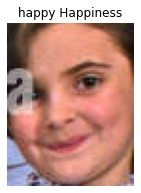

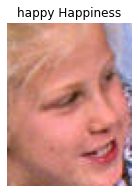

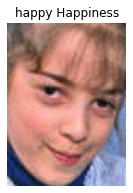

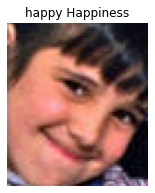

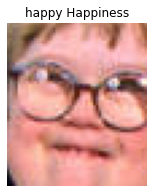

<Figure size 360x360 with 0 Axes>

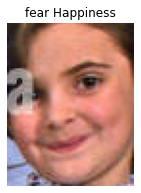

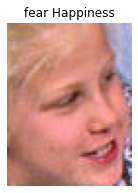

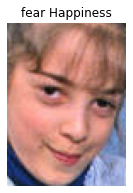

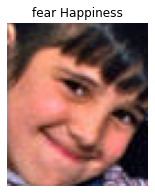

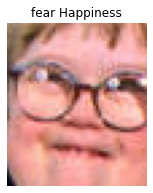

<Figure size 360x360 with 0 Axes>

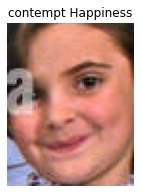

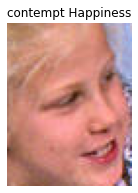

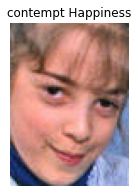

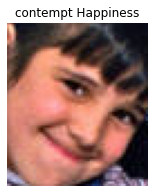

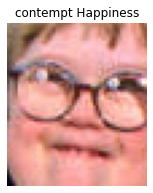

<Figure size 360x360 with 0 Axes>

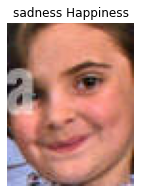

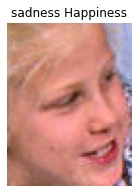

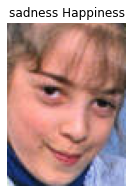

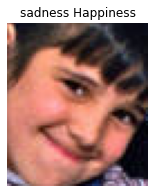

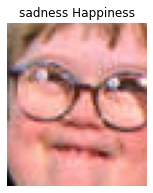

<Figure size 360x360 with 0 Axes>

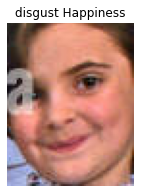

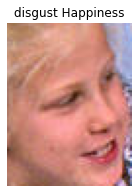

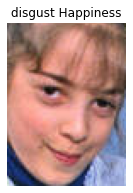

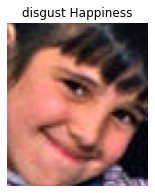

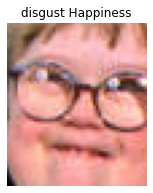

<Figure size 360x360 with 0 Axes>

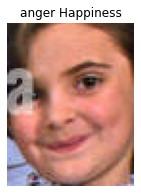

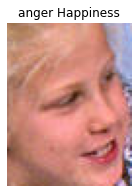

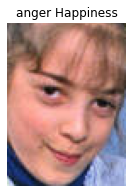

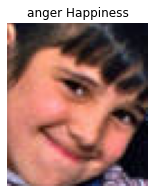

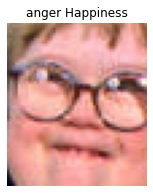

<Figure size 360x360 with 0 Axes>

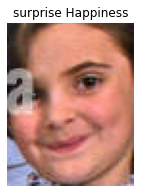

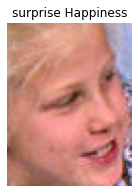

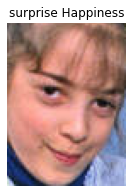

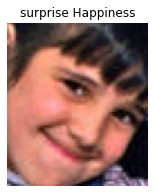

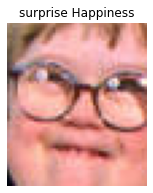

In [168]:
for fn in ['happy','fear','contempt','sadness','disgust','anger','surprise']:
    fpath='/content/face-emotion-recognition/test_images/autsm.jpg'
    frame_bgr=cv2.imread(fpath)
    plt.figure(figsize=(5, 5))
    frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    bounding_boxes, points = imgProcessing.detect_faces(frame)
    points = points.T
    for bbox,p in zip(bounding_boxes, points):
        box = bbox.astype(np.int)
        x1,y1,x2,y2=box[0:4]    
        face_img=frame[y1:y2,x1:x2,:]

        img_tensor = test_transforms(Image.fromarray(face_img))
        img_tensor.unsqueeze_(0)
        scores = model(img_tensor.to(device))
        scores=scores[0].data.cpu().numpy()
        plt.figure(figsize=(3, 3))
        plt.axis('off')
        plt.imshow(face_img)
        plt.title(fn+' '+idx_to_class[np.argmax(scores)])
        print(fn,[(idx_to_class[i],scores[i]) for i in range(len(scores))])

<ipython-input-169-26b41fba7f3f>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  box = bbox.astype(np.int)


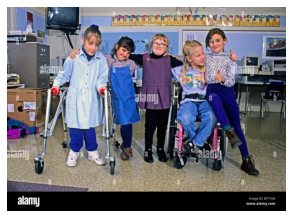

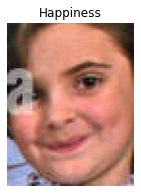

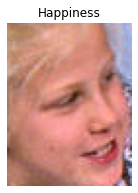

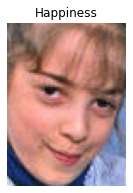

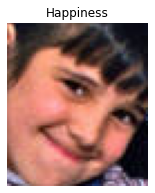

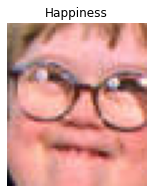

In [169]:
fpath='/content/face-emotion-recognition/test_images/autsm.jpg'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    img_tensor = test_transforms(Image.fromarray(face_img))
    img_tensor.unsqueeze_(0)
    scores = model(img_tensor.to(device))
    scores=scores[0].data.cpu().numpy()
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(idx_to_class[np.argmax(scores)])

In [94]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patheffects as PathEffects
from PIL import Image, ImageDraw, ImageOps
%matplotlib inline
import seaborn as sns
import random
import os
import gc

from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D

from tensorflow.keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, load_img

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
     

In [93]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.7 MB/s eta 0:00:00


In [95]:
# Creating file path for our train data and test data
train_dir = "/content/face-emotion-recognition/AutismDataset/train"
test_dir = "/content/face-emotion-recognition/AutismDataset/test"
     

In [96]:
# Getting 'Autistic' and 'Non-Autistic' train images from respective file names of train data
train_non_autistic = []
train_autistic = []
for i in os.listdir(train_dir):
    if 'Non_Autistic' in ("/content/face-emotion-recognition/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("/content/face-emotion-recognition/AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("/content/face-emotion-recognition/AutismDataset/train/{}".format(i)))
        
# Getting test images from test data file path
test_imgs = ["/content/face-emotion-recognition/AutismDataset/test/{}".format(i) for i in os.listdir(test_dir)]


# Concatenate 'Autistic'  and 'Non-Autistic' images and shuffle them as train_images
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

# Remove the lists to save space
del train_autistic
del train_non_autistic
gc.collect()

82558

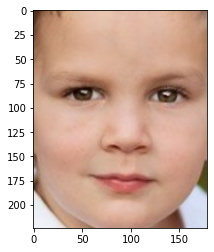

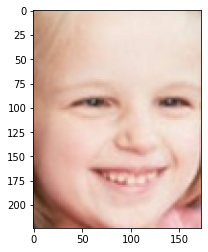

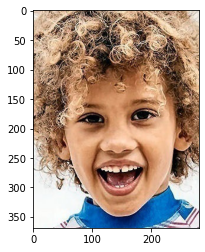

In [97]:
# Plot first 3 images from train_imgs
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [98]:
# Set the dimensions for images
nrows = 150
ncolumns  = 150
channels = 3

# Read and process the images: Function returns X,y. X - list of resized images, y - list of labels for the images

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

In [99]:
# Get resized images and labels from train data
X_train, y_train = read_and_process_image(train_imgs)

In [100]:
# Convert the lists to array
sns.set_palette(sns.color_palette(["b", "r"]))
plt.figure(figsize=(12, 8))
X_train = np.array(X_train)
y_train = np.array(y_train)
#sns.countplot(y_train, saturation=1)
#plt.title("Train image labels");

<Figure size 864x576 with 0 Axes>

In [101]:
# Function for pre-processing images for input to t-sne algorithm
def process_data_tsne(list_of_images):
    
    """ Read and pre-process images to specified dimensions, separate image pixels and labels, convert the lists to numpy array
    
    Parameters:
    list_of_images: Input image data
    
    Returns:
    Numpy array of image pixels and labels
    """
    
    nrows = 150
    ncolumns  = 150
    channels = 3
    
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.COLOR_BGR2GRAY), (nrows, ncolumns)))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    X = np.asarray(X)
    y = np.asarray(y)
    X = X.reshape(2540, 150*150*3)
    
    return X,y

In [102]:
# Pre-process the image data and get the features and labels
features, labels = process_data_tsne(train_imgs)

In [103]:
# Perform t-sne on features
tsne = TSNE(random_state=42).fit_transform(features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [104]:
# Function for plotting t-sne result as 3D data points
def visualise_tsne_3d(tsne_data, target):
    colour_map = []
    for i in target:
        if i == 1:
            colour_map.append('r')
        else:
            colour_map.append('b')

    fig = plt.figure(figsize=(18, 18))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*zip(*tsne), c=colour_map, s=30, alpha=1)
    legenditems = [(plt.Rectangle((0,0),1,1, color=c), "Non_Autistic" if str(i) == '0' else "Autistic") for i,c in enumerate(np.unique(colour_map))]
    plt.legend(*zip(*legenditems))
    plt.show()
     


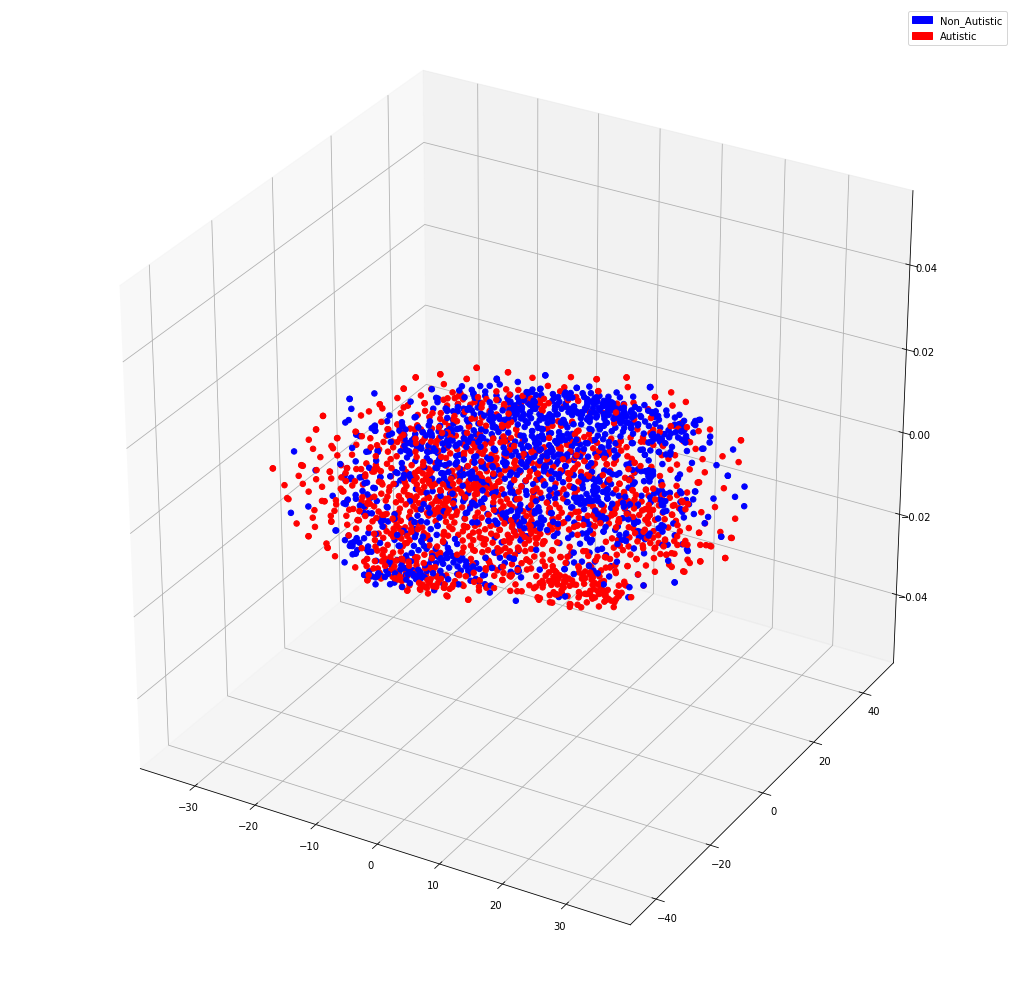

In [105]:
# Visualise t-sne result in 3D
visualise_tsne_3d(tsne, labels)

In [106]:
# Function for plotting t-sne result as data points
def visualise_tsne_datapoints(tsne_data, labels):
    
    """Takes in tsne projections, plots distribution of datapoints in 2 classes"""
    
    tx = tsne_data[:,0]
    ty = tsne_data[:,1]
    plt.figure(figsize=(20,18))
    sns.scatterplot(
    x=tx, y=ty,
    hue=labels,
    palette=['blue', 'red'],
    s=300, 
    legend='auto'
    )
     

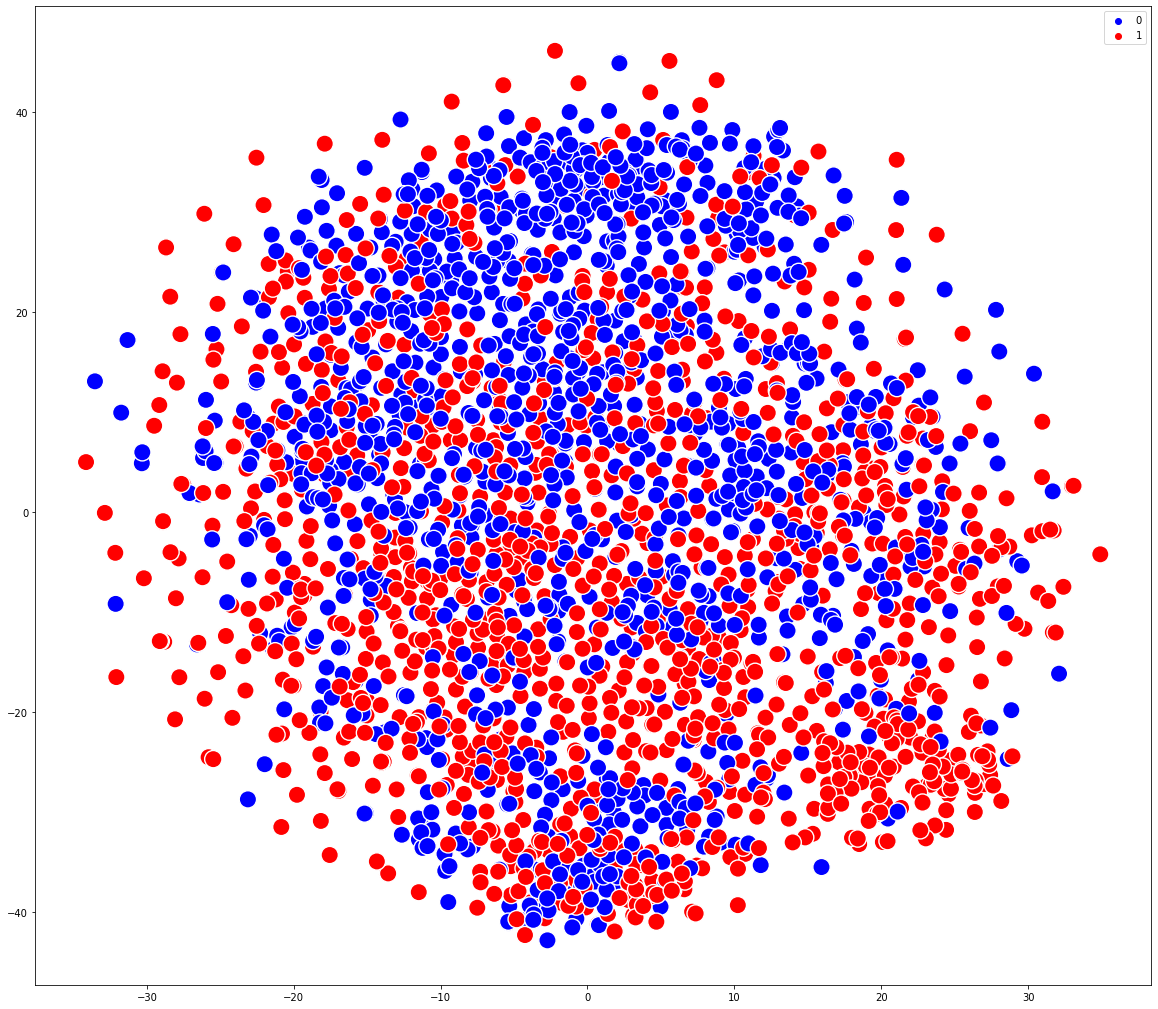

In [107]:
# Visualise class data points in 2 dimensional space
visualise_tsne_datapoints(tsne,labels)
     

In [108]:
# Function to plot t-sne result as images
def visualise_tsne_images(tsne_data, train_images, labels):
    
    """Takes in tsne projections, plots distribution of images in 2 classes"""
    
    tx = tsne_data[:,0]
    ty = tsne_data[:,1]
    image_paths = [train_images[i] for i in range(len(train_images))]
    #label = y_train

    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 200

    full_image = Image.new('RGBA', (width, height))
    for img, x, y, label in zip(image_paths, tx, ty, labels):
        tile = Image.open(img)
        rs = max(1, tile.width/max_dim, tile.height/max_dim)
        tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
        tile_height, tile_width = tile.size
        draw = ImageDraw.Draw(tile)
        draw.rectangle((0,0,tile_height-1,tile_width-1), fill=None, outline='blue' if label==0 else 'red', width=8)
        full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*(1-y))), mask=tile.convert('RGBA'))   
    plt.figure(figsize = (30,28))
    plt.imshow(full_image)

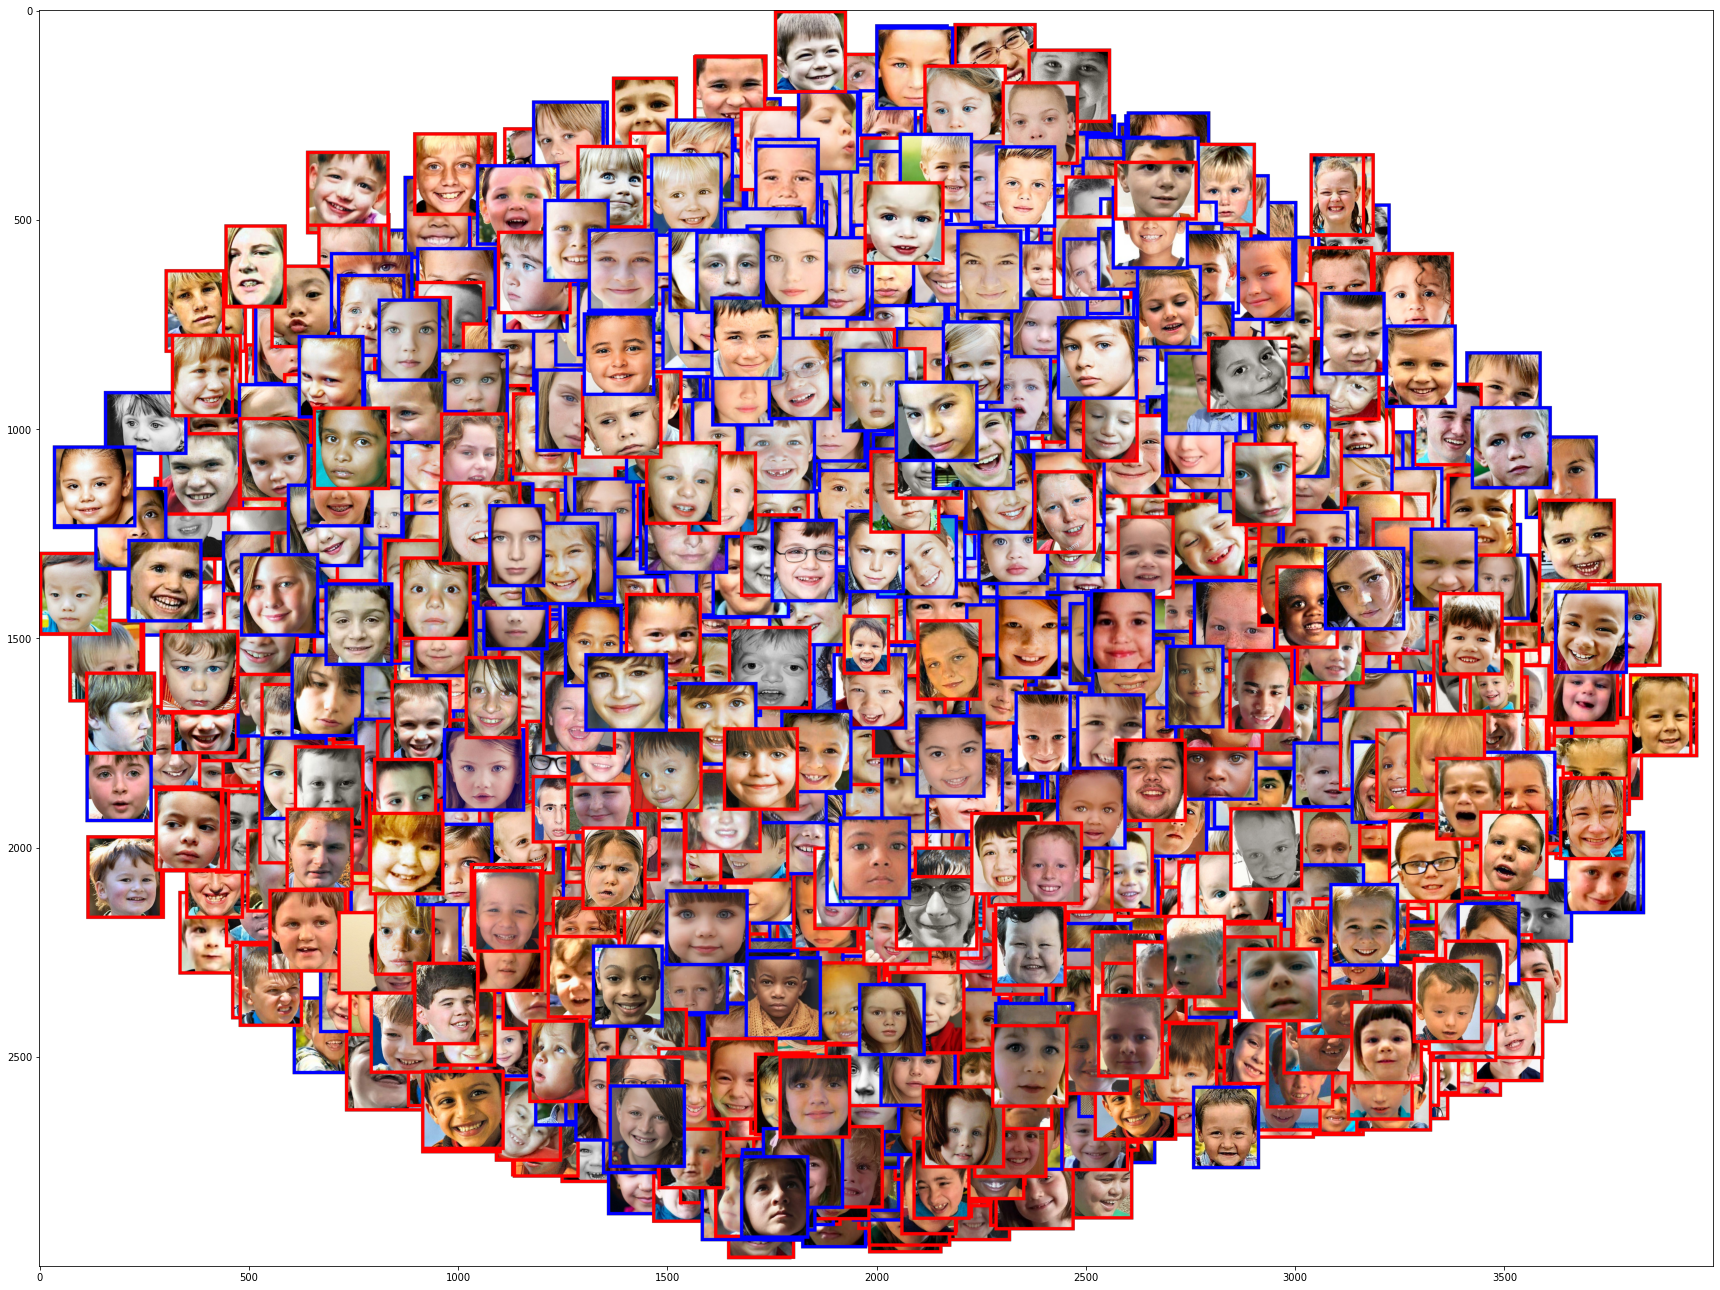

In [109]:
# Visualise class images in 2 dimesional space
visualise_tsne_images(tsne, train_imgs, labels)

In [117]:
# Shape of train images and labels
print("Shape of train images:", X_train.shape)
print("Shape of train labels:", y_train.shape)

Shape of train images: (2540, 150, 150, 3)
Shape of train labels: (2540,)


8